# 1. DATA COLLECTION AND ANALYSIS

In [1]:
import pandas as pd
import statistics as st
import matplotlib_inline as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#adding warning

In [2]:
pd.read_excel("Data_Train.xlsx").to_csv("Data_Train1.csv", index=False)

In [3]:
df = pd.read_csv("Data_Train1.csv")

In [4]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
print(df.shape)

(10683, 11)


In [6]:
print(df.dtypes)

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object


In [7]:
df["Route"] = df["Route"].astype("str").str.replace("→", "-")

In [8]:
# df["Dep_Time"] = df["Dep_Time"].astype("str").str.replace(":", ".").astype("float")

In [9]:
df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])

C:\Users\suraj\AppData\Local\Temp\ipykernel_19984\1954500797.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Date_of_Journey"] = pd.to_datetime(df["Date_of_Journey"])


In [10]:
df = df.sort_values(by = "Date_of_Journey", ascending= True).reset_index()

In [11]:
print(df.isna().sum())

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [12]:
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

index              0
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [14]:
df.head(5)

,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,11:40,00:45 02 Mar,13h 5m,1 stop,No info,26890
1,6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR - HYD - DEL,15:35,23:40,8h 5m,1 stop,1 Long layover,7744
2,1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,08:00,20:20,12h 20m,1 stop,No info,27992
3,6321,Air India,2019-01-03,Banglore,New Delhi,BLR - BOM - AMD - DEL,08:50,23:55 02 Mar,39h 5m,2 stops,No info,17135
4,6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,11:40,11:25 02 Mar,23h 45m,1 stop,No info,25735


In [15]:
print(df["Airline"].value_counts())

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [16]:
def newa(x):
    if x=='Jet Airways Business':
        return 'Jet Airways'
    else:
        return x
df['Airline'] = df['Airline'].apply(newa)

In [17]:
print(df["Airline"].value_counts())

Jet Airways                          3855
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [18]:
start_date = df.iloc[0, 2]
end_date = df.iloc[10681, 2]
diff_date = end_date - start_date
print(start_date, end_date, diff_date)

2019-01-03 00:00:00 2019-12-06 00:00:00 337 days 00:00:00


In [19]:
def time_string_to_float(time_str):
    parts = time_str.split()

    if len(parts) == 2:
        try:
            hours = int(parts[0].replace('h', ''))
            minutes = int(parts[1].replace('m', ''))
            total_hours = hours + minutes / 60.0
            return total_hours
        except ValueError:
            return None
    elif len(parts) == 1 and 'h' in parts[0]:
        hours = int(parts[0].replace("h", ""))
        return hours
    else:
        return None

df["Duration"] = df["Duration"].apply(time_string_to_float)
df.head()



,index,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,959,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,11:40,00:45 02 Mar,13.083333,1 stop,No info,26890
1,6336,SpiceJet,2019-01-03,Banglore,New Delhi,BLR - HYD - DEL,15:35,23:40,8.083333,1 stop,1 Long layover,7744
2,1654,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,08:00,20:20,12.333333,1 stop,No info,27992
3,6321,Air India,2019-01-03,Banglore,New Delhi,BLR - BOM - AMD - DEL,08:50,23:55 02 Mar,39.083333,2 stops,No info,17135
4,6314,Jet Airways,2019-01-03,Banglore,New Delhi,BLR - BOM - DEL,11:40,11:25 02 Mar,23.750000,1 stop,No info,25735


In [20]:
df["Duration"] = round(df["Duration"], 2)
# print(df["Duration"])

In [21]:
df = df.drop(["Additional_Info"], axis = 1)

In [25]:
print(df["Source"].value_counts())

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [26]:
print(df["Destination"].value_counts())

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [27]:
print(df["Route"].value_counts())

DEL - BOM - COK          2376
BLR - DEL                1552
CCU - BOM - BLR           979
CCU - BLR                 724
BOM - HYD                 621
                         ... 
BOM - BBI - HYD             1
BOM - JAI - DEL - HYD       1
CCU - IXB - DEL - BLR       1
CCU - IXZ - MAA - BLR       1
BLR - BOM - IXC - DEL       1
Name: Route, Length: 128, dtype: int64


In [28]:
df["Price"].describe()

count    10682.000000
mean      9087.214567
std       4611.548810
min       1759.000000
25%       5277.000000
50%       8372.000000
75%      12373.000000
max      79512.000000
Name: Price, dtype: float64

In [29]:
print(df.dtypes)

index                       int64
Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                  float64
Total_Stops                object
Price                       int64
dtype: object


In [30]:
df.groupby("Airline").agg(avg_price = ("Price", "mean"), avg_duration = ("Duration", "mean")).sort_values(by = "avg_price", ascending= False)

,avg_price,avg_duration
Airline,,
Jet Airways,11716.631128,14.150254
Multiple carriers Premium economy,11418.846154,10.106923
Multiple carriers,10902.678094,10.429406
Air India,9612.427756,15.724891
Vistara Premium economy,8962.333333,2.553333
Vistara,7796.348643,9.973528
GoAir,5861.056701,4.983814
IndiGo,5673.682903,4.756137
Air Asia,5590.260188,5.803950


In [31]:
df.groupby(["Airline", "Destination"]).agg(
    avg_price=pd.NamedAgg(column="Price", aggfunc="mean"),
    avg_duration=pd.NamedAgg(column="Duration", aggfunc="mean")
).sort_values(by="avg_price", ascending=False)

avg_price  avg_duration
Airline                           Destination                            
Jet Airways                       New Delhi    15553.812796     13.289834
                                  Cochin       12688.871537     17.176946
Vistara                           Hyderabad    12326.521739     17.218261
Vistara Premium economy           New Delhi    11793.000000      2.580000
Jet Airways                       Banglore     11717.565287     15.950064
Multiple carriers Premium economy Cochin       11418.846154     10.106923
Air India                         New Delhi    11045.575472     16.215802
Multiple carriers                 Cochin       10902.678094     10.429406
Air India                         Banglore     10357.324219     17.317930
                                  Cochin       10003.446381     18.786059
Vistara                           Banglore      9257.683060     19.080601
Vistara Premium economy           Kolkata       9125.000000      2.250000
Vistara                           New Delhi     8947.388889      5.381296
Air Asia                          Cochin        7804.175000     10.065625
GoAir                             New Delhi     7532.333333      3.180000
Vistara                           Kolkata       7491.372093      2.283488
IndiGo                            New Delhi     7312.828025      3.358025
                                  Cochin        7203.933333      8.548638
GoAir                             Banglore      7047.000000      7.288400
                                  Cochin        6587.157895      6.746316
Vistara                           Cochin        6465.644444      3.142222
Jet Airways                       Delhi         6412.954054      2.961676
Air India                         Hyderabad     6260.051471      5.988667
Jet Airways                       Hyderabad     6227.949772      2.442146
SpiceJet                          New Delhi     6223.727273      3.795000
Air India                         Delhi         6045.166667      2.790917
Vistara Premium economy           Delhi         5969.000000      2.830000
SpiceJet                          Cochin        5916.356322      5.135517
Air India                         Kolkata       5895.640000      2.250000
Air Asia                          New Delhi     5791.944444      2.790000
IndiGo                            Banglore      5075.235955      3.215101
Vistara                           Delhi         5042.312977      2.743282
Air Asia                          Banglore      5012.320000      5.312667
SpiceJet                          Banglore      4642.883333      3.177633
IndiGo                            Kolkata       4538.766304      2.357826
                                  Delhi         4399.581967      2.861530
Air Asia                          Delhi         4265.577465      2.804085
Trujet                            Hyderabad     4140.000000      3.250000
GoAir                             Delhi         4050.289855      2.834928
SpiceJet                          Delhi         4012.839416      2.805693
                                  Kolkata       3993.523438      2.309141
IndiGo                            Hyderabad     3659.816327      1.522806
SpiceJet                          Hyderabad     2511.106557      1.525820

In [32]:
df["Months"] = df["Date_of_Journey"].dt.month
print(df[["Date_of_Journey", "Months"]])

      Date_of_Journey  Months
0          2019-01-03       1
1          2019-01-03       1
2          2019-01-03       1
3          2019-01-03       1
4          2019-01-03       1
...               ...     ...
10678      2019-12-06      12
10679      2019-12-06      12
10680      2019-12-06      12
10681      2019-12-06      12
10682      2019-12-06      12

[10682 rows x 2 columns]


In [33]:
df.groupby("Months").agg(avg_price = ("Price", "mean"), avg_duration = ("Duration", "mean")).sort_values(by = "avg_price", ascending= False)

,avg_price,avg_duration
Months,,
1,10492.642791,11.081740
9,9551.474395,11.742098
5,9361.077628,11.708505
6,9215.649310,10.678836
12,9110.774295,11.434044
3,8433.839891,10.026590
4,5230.860849,3.773042


In [57]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

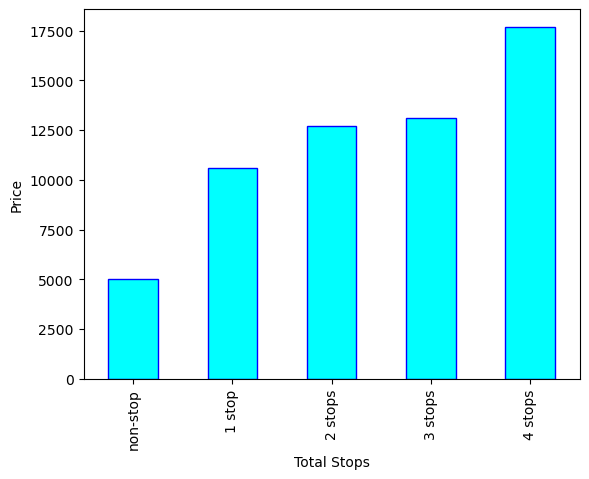

In [58]:
df.groupby(['Total_Stops'])['Price'].mean().sort_values().plot(kind='bar',color='cyan',edgecolor='blue')
plt.xlabel('Total Stops')
plt.ylabel('Price')
plt.savefig("../project1-team1/Fig5.png")
plt.show()

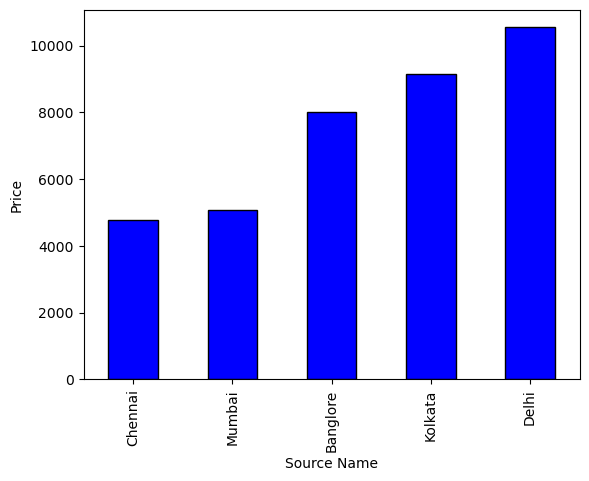

In [59]:
df.groupby(['Source'])['Price'].mean().sort_values().plot(kind='bar',color='b',edgecolor='black')
plt.xlabel('Source Name')
plt.ylabel('Price')
plt.savefig("../project1-team1/Fig1.png")

In [35]:
# Labels for the sections of our pie chart
labels = ["Cochin", "Banglore", "Delhi", "New Delhi","Hyderabad","Kolkata"]

# The values of each section of the pie chart
sizes = [4536, 2871, 1265, 932,696,381]

# The colors of each section of the pie chart
colors = ["Yellow", "Orange", "Red", "Blue","Pink", "Green"]

# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1,0.1,0.1,0.1,0.1,0.1)


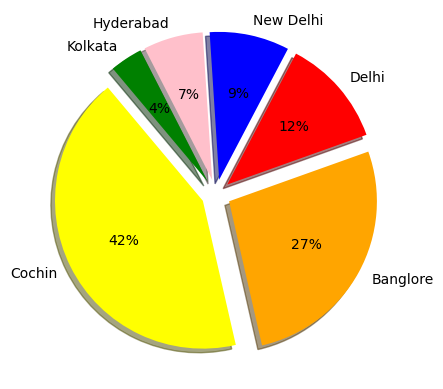

<Figure size 640x480 with 0 Axes>

In [36]:
plt.pie(sizes,labels=labels,colors=colors, autopct="%1.f%%",explode=explode, shadow=True, startangle=130)
plt.show()
plt.savefig("../project1-team1/Fig3.png")


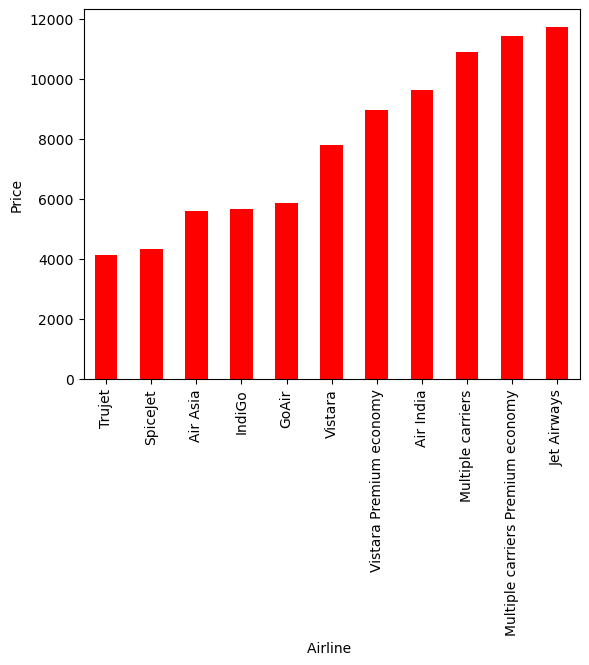

In [37]:
df.groupby(['Airline'])['Price'].mean().sort_values().plot(kind='bar',color='r')
plt.xlabel('Airline ')
plt.ylabel('Price')
plt.savefig("../project1-team1/Fig2.png")